<h1> Exercise 3 from Hands-On ML Ch.3

<h3> Step 1 Load and analyze the dataset

In [163]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic_kaggle")

In [164]:
import pandas as pd
import numpy as np

In [165]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [166]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [167]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

We are trying to make predictions on the test data (label is missing for the test)

In [168]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [170]:
type(train_data)

pandas.core.frame.DataFrame

In [171]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [172]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>We see that out of 891 people, only 342 people survived. (Approx. 38%)

In [173]:
np.sum(train_data["Survived"] == 1)

342

In [174]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [175]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [176]:
342 / 891

0.3838383838383838

<h2> Step2: Data Cleaning and Feature Selection

Now we need to determine which features are important

<hr>
Numerical attribute: "Age", "SibSp", "Parch", "Fare" <br><br>
Categorical attribute: "Pclass", "Sex", "Embarked" <br><br>
attirbute with missing values: Age, Embarked <br> <br>
Dropped attribute:'Name','Ticket','Cabin','PassengerId' <br><br>
Target attribute: "Survived"

In [177]:
train_data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True) 
# this is not neccessary since later on at the Pipeline we only select needed features but just in case

In [178]:
import seaborn as sns

<h4> Check some correlation, playing with copied data

In [194]:
copied_data = train_data.copy()

In [195]:
copied_data.shape

(891, 8)

In [196]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [207]:
median = copied_data['Age'].median()

In [227]:
copied_data['Age'].value_counts().iloc[:10]

19.0    204
16.0     46
20.0     45
14.0     40
24.0     40
12.0     39
18.0     36
22.0     35
15.0     27
13.0     25
Name: Age, dtype: int64

In [208]:
copied_data['Age'].fillna(median,inplace=True)

Categorize the age <br>
(-0.001 - 2] <br>
(2 - 18] <br>
etc...


In [219]:
bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

copied_data['AgeRange'] = pd.cut(copied_data['Age'], bins, labels=names)

In [220]:
copied_data['AgeRange'].head()

0     2-18
1    18-35
2     2-18
3    18-35
4    18-35
Name: AgeRange, dtype: category
Categories (5, object): [<2 < 2-18 < 18-35 < 35-65 < 65+]

In [221]:
copied_data['AgeRange'].value_counts()

18-35    503
2-18     307
35-65     51
<2        30
65+        0
Name: AgeRange, dtype: int64

<b>You see that most of the toddlers survived (67% of 30 toddlers survived)

/anaconda3/envs/NLP/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


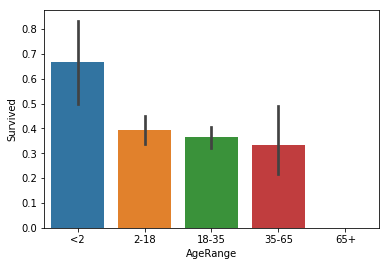

In [222]:
a = sns.barplot(data=copied_data, x="AgeRange",y="Survived")

/anaconda3/envs/NLP/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


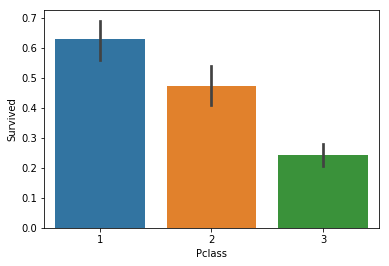

In [204]:
g = sns.barplot(data=copied_data, x='Pclass', y="Survived") 

<h4>Build a pipeline 

<h5> Pipeline for Numerical data

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])), # to select the features
        ("imputer", SimpleImputer(strategy="median")), # to fill in the NaN values
    ])

In [116]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

<h5> Pipeline for categorical data

We will fill NA value with most frequent category. X[c].value_counts().index[0] is used since the resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [117]:
# copied from Note 03 from Geron
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns) 
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [120]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

<h5> Total Pipeline

In [121]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [122]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),   
    ])

In [123]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train[0] # Age = 22, SibSp = 1, Parch = 0, Fare = 7.25, Pclass = [0,0,1], Sex = [0,1], Embarked = [0,0,1]

array([22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ])

Split data to train and label 

In [124]:
X_train.shape

(891, 12)

In [125]:
y_train = train_data["Survived"]

In [126]:
y_train.shape

(891,)

<h4> X_test data 

In [128]:
X_test = preprocess_pipeline.transform(test_data)

<h2> Step 3: Train the models

Models we are going to train:  <h4> Support Vector Classifier, Logistic Regression, Decision Trees, Random Forest 

In [229]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

/anaconda3/envs/NLP/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)